In [1]:
import pandas as pd

In [2]:
questions = pd.read_csv("EP_cleaned_semi_generated_answer_pairs - answer_generation_prompts.csv")
questions.head()

,question_type,abstract,generated_question,answer_generation_prompt,answer_generation_filled_prompt,generated_answer,notes
0,"""factoid""",Given the current status of coronavirus diseas...,What is the relationship between a covid-10 in...,You are an AI assistant that answers questions...,NaN,NaN,NaN
1,"""yes/no""",Purpose: This study aimed to synthesize qualit...,Can female adolescents with a history of anxie...,You are an AI assistant that answers questions...,NaN,NaN,NaN
2,"""yes/no""",Introduction: Oropharyngeal dysphagia (OD) is ...,Could the detection of oropharyngeal dysphagia...,You are an AI assistant that answers questions...,NaN,NaN,NaN
3,descriptive,Wandering spleen is a cause of acute surgical ...,Describe a wandering spleen,You are an AI assistant that answers questions...,NaN,NaN,NaN
4,"""factoid""","Lipodystrophy syndromes are rare, heterogeneou...",What is Lipodystrophy?,You are an AI assistant that answers questions...,NaN,NaN,NaN


In [13]:
questions["answer_generation_filled_prompt"] = [f"{questions['answer_generation_prompt'][ind]} Context: {questions['abstract'][ind]}. Question: {questions['generated_question'][ind]}" for ind in questions.index]

In [14]:
questions.head()

,question_type,abstract,generated_question,answer_generation_prompt,answer_generation_filled_prompt,generated_answer,notes
0,"""factoid""",Given the current status of coronavirus diseas...,What is the relationship between a covid-10 in...,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,NaN,NaN
1,"""yes/no""",Purpose: This study aimed to synthesize qualit...,Can female adolescents with a history of anxie...,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,NaN,NaN
2,"""yes/no""",Introduction: Oropharyngeal dysphagia (OD) is ...,Could the detection of oropharyngeal dysphagia...,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,NaN,NaN
3,descriptive,Wandering spleen is a cause of acute surgical ...,Describe a wandering spleen,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,NaN,NaN
4,"""factoid""","Lipodystrophy syndromes are rare, heterogeneou...",What is Lipodystrophy?,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,NaN,NaN


In [17]:
questions.to_csv('questions_filled_prompt.csv', index=False) 

In [19]:
question_answer_pairs = pd.read_csv("questions_filled_prompt - questions_filled_prompt.csv")
question_answer_pairs.head()

,question_type,abstract,generated_question,answer_generation_prompt,answer_generation_filled_prompt,generated_answer
0,"""factoid""",Given the current status of coronavirus diseas...,What is the relationship between a covid-10 in...,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,COVID-19 increases global RNA editing activity...
1,"""yes/no""",Purpose: This study aimed to synthesize qualit...,Can female adolescents with a history of anxie...,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,"Yes, female adolescents with anxiety or depres..."
2,"""yes/no""",Introduction: Oropharyngeal dysphagia (OD) is ...,Could the detection of oropharyngeal dysphagia...,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,"Yes, detecting oropharyngeal dysphagia could r..."
3,descriptive,Wandering spleen is a cause of acute surgical ...,Describe a wandering spleen,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,Wandering spleen: Displacement due to weak lig...
4,"""factoid""","Lipodystrophy syndromes are rare, heterogeneou...",What is Lipodystrophy?,You are an AI assistant that answers questions...,You are an AI assistant that answers questions...,Lipodystrophy: Rare disorders - adipose tissue...


In [31]:
mapping = {'"factoid"': 'factoid', '"yes/no"': 'yes/no', '"how"': 'how'}

# Replace the values in the specified column using the mapping
question_answer_pairs['question_type'] = question_answer_pairs['question_type'].replace(mapping)

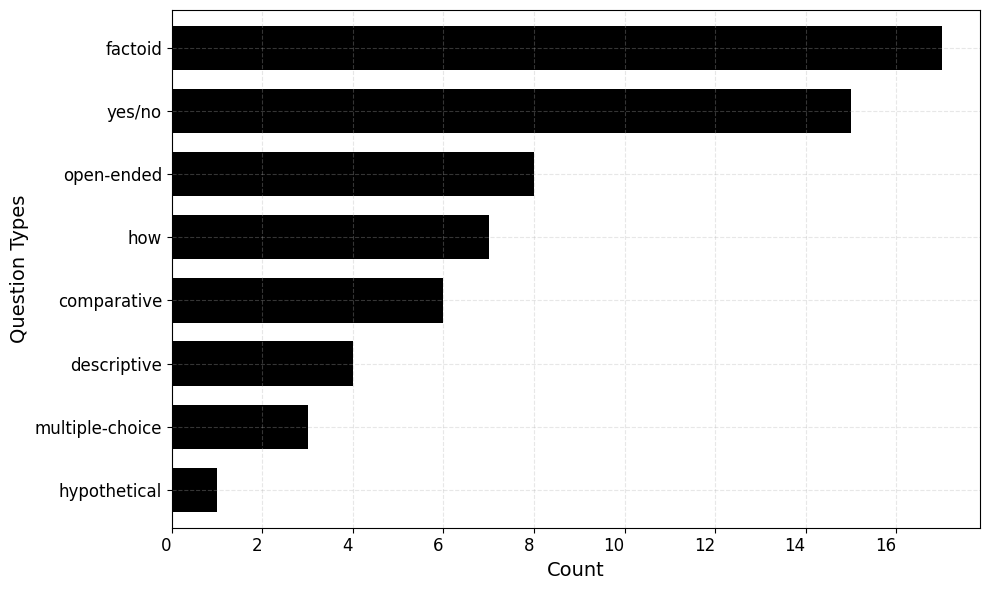

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

#colors = sns.color_palette("black", len(question_answer_pairs["question_type"].value_counts()))
plt.figure(figsize=(10, 6))
value_counts = question_answer_pairs["question_type"].value_counts().sort_values(ascending=True)
value_counts.plot(kind="barh", color="black", width=0.7)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Question Types", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(ha="right", fontsize=12)
plt.grid(alpha=0.3, linestyle="--")

plt.savefig("question_types.png", transparent=True)

plt.tight_layout()
plt.show()